 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [18]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [19]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv)

# Standardize the date format - YYYY-MM-DD format will be used for all the portfolios
whale_df['Date'] = pd.to_datetime(whale_df['Date'], errors='coerce')
whale_df['Date'] = whale_df['Date'].dt.strftime('%Y-%m-%d')

# Set the index and sort the dataframe
whale_df = whale_df.set_index('Date').sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [20]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [21]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [23]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv) 

# Standardize the date format - YYYY-MM-DD format will be used for all the portfolios
algo_df['Date'] = pd.to_datetime(algo_df['Date'], errors='coerce')
algo_df['Date'] = algo_df['Date'].dt.strftime('%Y-%m-%d')

# Sort the dataframe
algo_df = algo_df.set_index('Date').sort_index()  
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [24]:
# Count nulls for algo dataframe
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [25]:
# Drop nulls for algo dataframe
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [26]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv)

# Standardize the date format - YYYY-MM-DD format will be used for all the portfolios
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'], errors='coerce')
sp500_df['Date'] = sp500_df['Date'].dt.strftime('%Y-%m-%d')

# Sort the dataframe
sp500_df = sp500_df.set_index('Date').sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [27]:
# Check Data Types for S&P 500 porfolio
sp500_df.dtypes

Close    object
dtype: object

In [28]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace('$', '').astype('float64')
sp500_df.dtypes

Close    float64
dtype: object

In [29]:
# Calculate Daily Returns
sp500_daily_returns_df = sp500_df.pct_change()
sp500_daily_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [30]:
# Drop nulls in S&P 500 dataframe
sp500_daily_returns_df = sp500_daily_returns_df.dropna()
sp500_daily_returns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [31]:
# Rename Column of S&P 500 dataframe
sp500_daily_returns_df.columns = ["S&P 500"]
sp500_daily_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [32]:
# Concatenate all DataFrames into a single DataFrame
combined_all_returns_df = pd.concat([whale_df,algo_df,sp500_daily_returns_df], axis = 'columns', join = "inner")
combined_all_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

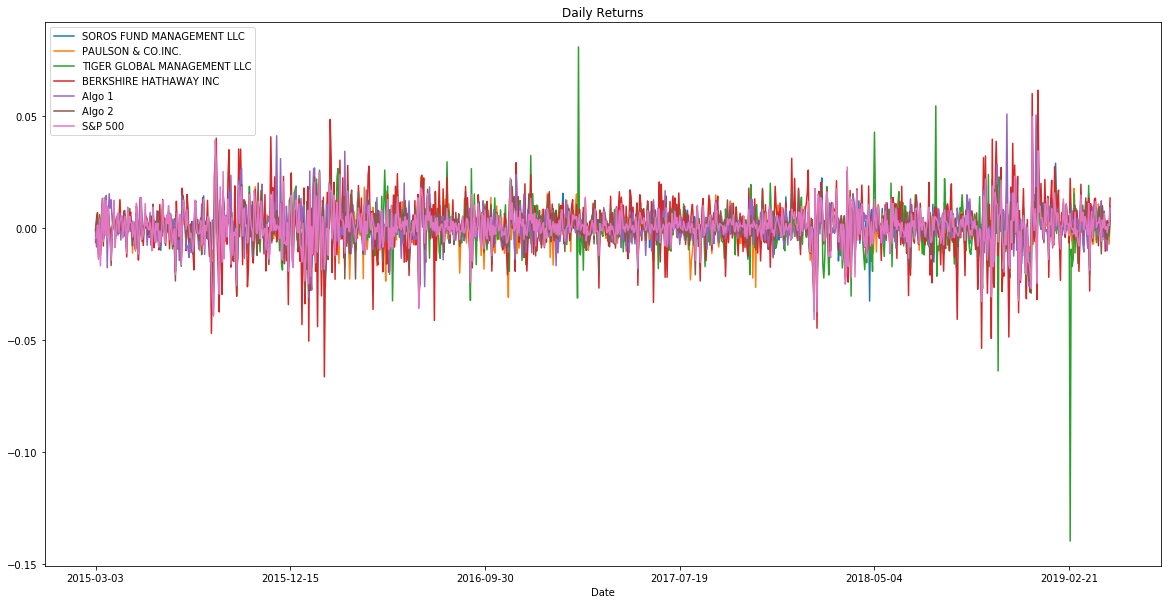

In [33]:
# Plot daily returns
combined_all_returns_df.plot(figsize = (20,10), title = 'Daily Returns')

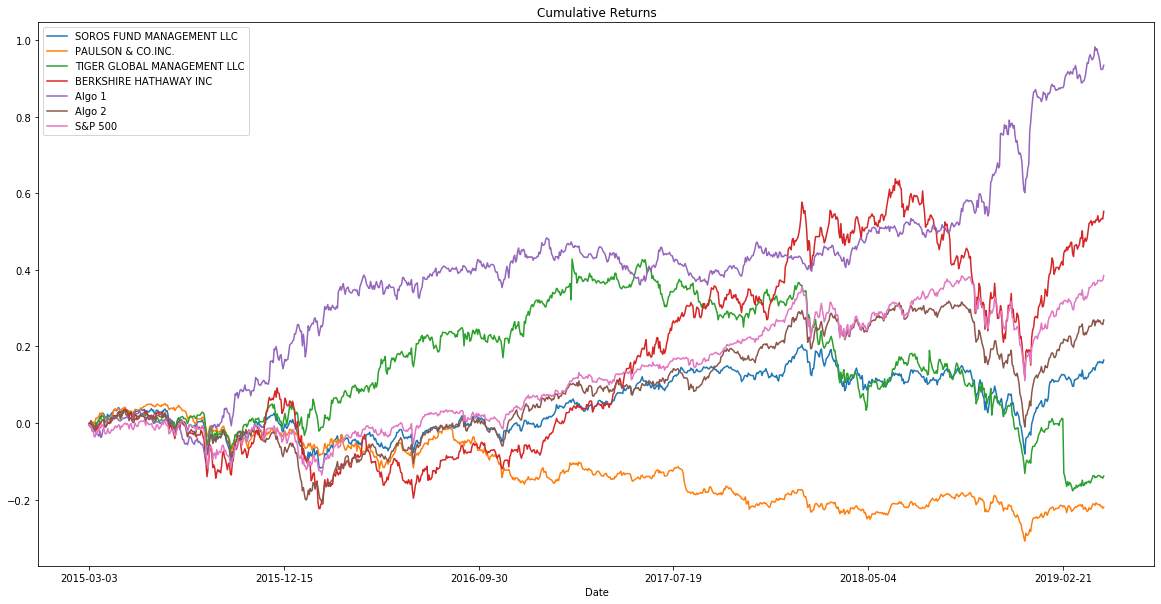

In [34]:
# Plot cumulative returns
cumulative_returns_df = (1 + combined_all_returns_df).cumprod() - 1
cumulative_returns_df.plot(figsize = (20,10), title = 'Cumulative Returns')

In [37]:
cumulative_returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,0.372945
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,0.369823
2019-04-18,0.159278,-0.217322,-0.141222,0.534716,0.923823,0.259590,0.371986
2019-04-22,0.156280,-0.223061,-0.144348,0.533046,0.925124,0.257151,0.373375
2019-04-23,0.164568,-0.220354,-0.138811,0.553401,0.934691,0.269247,0.385517


# Performance analysis 

### Qustion: Does any portfolio outperform the S&P 500?

### Answer: Based on the graph plotted two portfolios outperformed S&P 500. They are 
        
        1. ALGO 1 (0.934691) vs S&P benchmark return (0.385517)
        2. BERKSHIRE HATHAWAY INC (0.553401) vs vs S&P benchmark return (0.385517)

        Also, Paulso & Co has the worst retrun for the period 

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

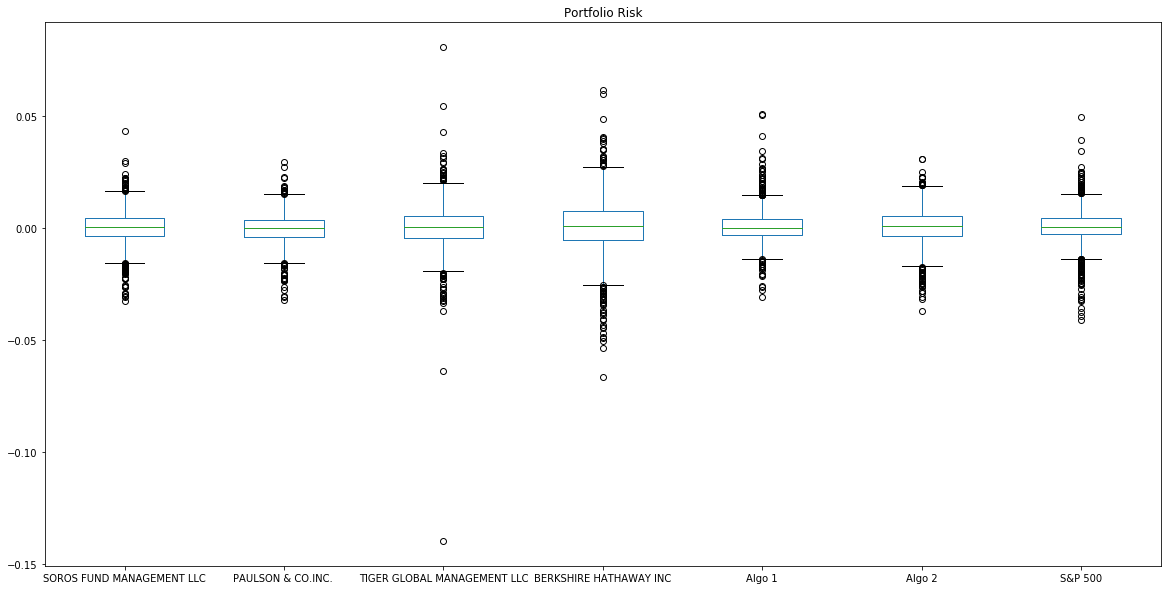

In [461]:
# Box plot to visually show risk
combined_all_returns_df.plot.box(figsize = (20,10), title = "Portfolio Risk")

In [462]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
combined_std_df = combined_all_returns_df.std()
combined_std_df 

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

# Risk analysis

### Question:   Which portfolios are riskier than the S&P 500?

### Answer:     BERKSHIRE HATHAWAY INC (Std Deviation of 0.012919) and TIGER GLOBAL MANAGEMENT LLC (Std Deviation of 0.010894) are risker compared to S&P 500 

In [463]:
# Determine which portfolios are riskier than the S&P 500
combined_std_df > combined_std_df["S&P 500"]

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [464]:
# Calculate the annualized standard deviation (252 trading days)
annulized_std_df = combined_std_df * np.sqrt(252)
annulized_std_df

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

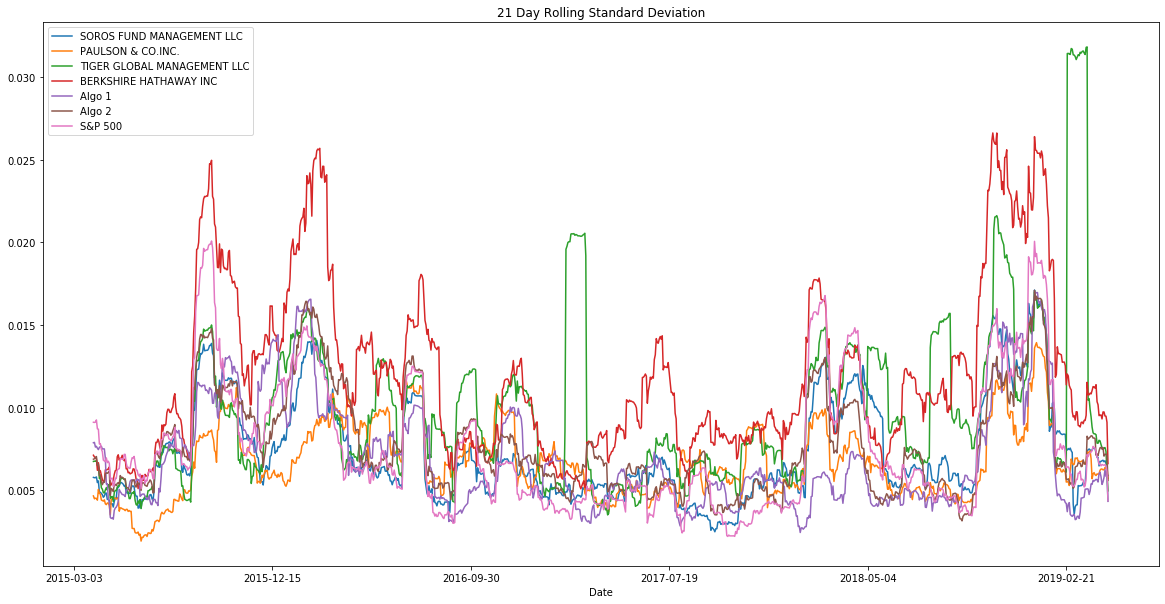

In [465]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_all_returns_df.rolling(window = 21).std().plot(figsize = (20,10), title = '21 Day Rolling Standard Deviation')

### Question:   Does the risk increase for each of the portfolios at the same time risk increases in the S&P?

### Answer:     For the most part, There is an increase in risk when there is a increase in S&P 500 risk. But, at the same time there are some notable anamoly. For example - Tiger Global Management between 09/2016 to 07/2017. The spike in risk is significant and also around 02/2019. 

In [44]:
# Construct a correlation table
correlation = combined_all_returns_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Question:   Which returns most closely mimic the S&P?

### Answer:     Algo 2 seems to be closely correlated to S&P 500 with a correlation value of 0.858764 

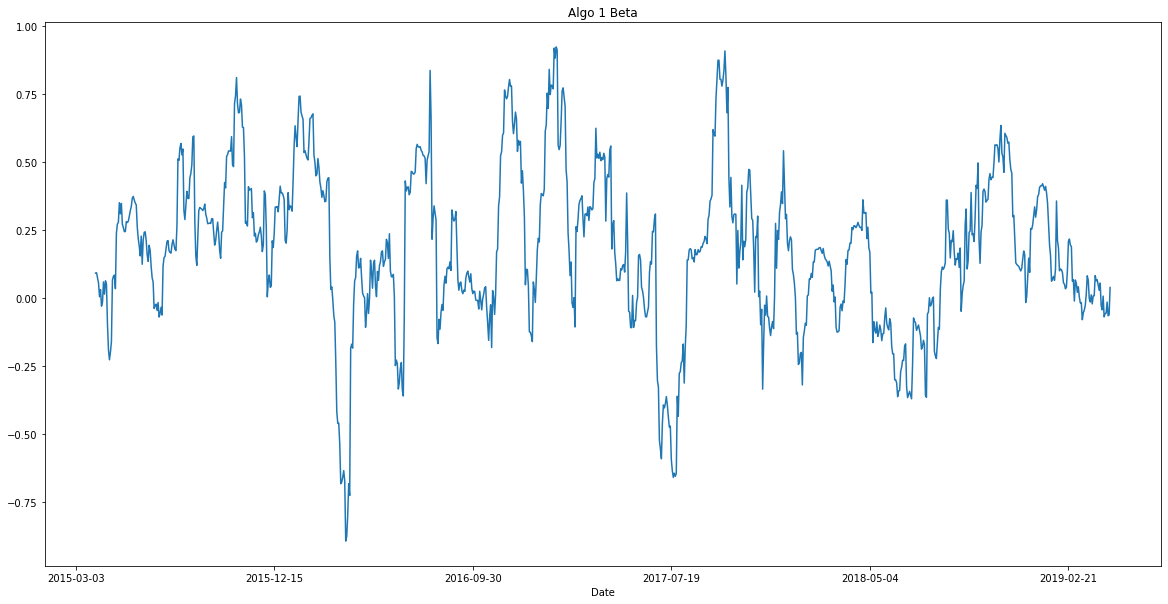

In [43]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# Beta is calculated for Algo 1 portfolio 

rolling_covariance_algo_1 = combined_all_returns_df['Algo 1'].rolling(window =21).cov(combined_all_returns_df['S&P 500'])
rolling_sp500_variance = combined_all_returns_df['S&P 500'].rolling(window=21).var()

rolling_beta_algo_1 = rolling_covariance_algo_1 / rolling_sp500_variance
rolling_beta_algo_1.plot(figsize=(20, 10), title='Algo 1 Beta')

### Question:   Does the portfolio seem sensitive to movements in the S&P 500?

### Answer:     Yes, Algo 1 seems to be sensitive to the movement of S&P 500.

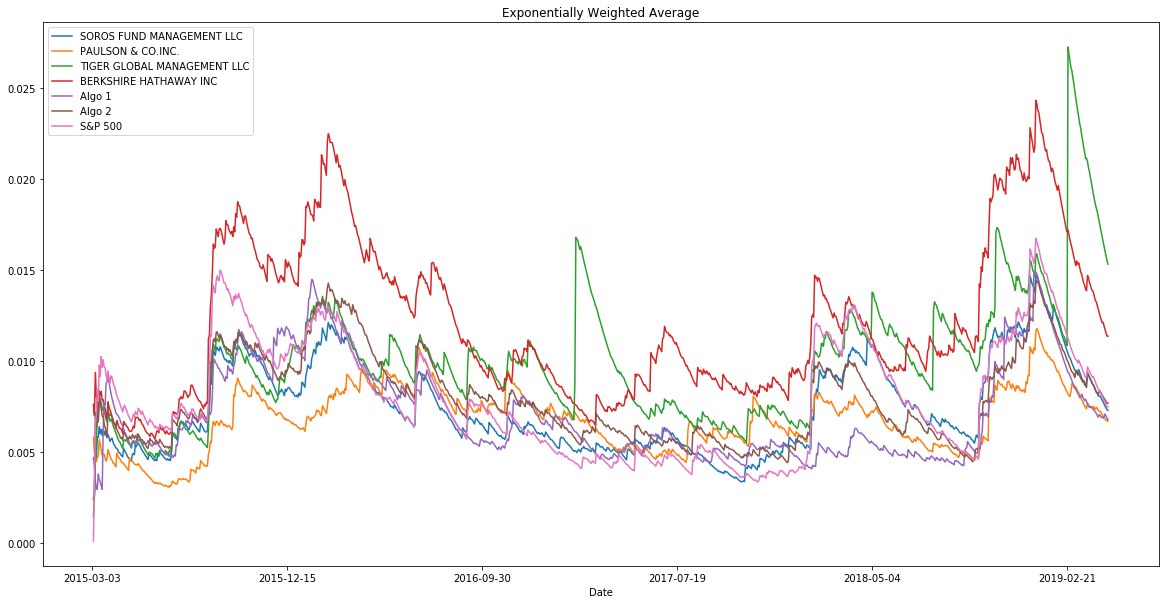

In [41]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_all_returns_df.ewm(halflife= 21).std().plot(figsize = (20,10), title = 'Exponentially Weighted Average')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [469]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_all_returns_df.mean() * 252) / (combined_all_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

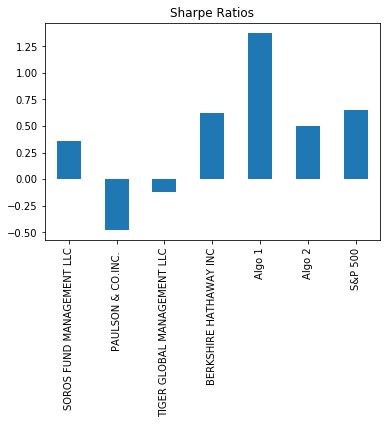

In [470]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind ='bar', title = 'Sharpe Ratios')

### Question: On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

### Algo 1 is able to outperform both S&P 500 and whale portfolios. But, Algo 2 is able to outperform some whale portfolios

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [94]:
# Read the google stock 
goog_csv = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csv)
goog_df.tail()

,Symbol,Trade DATE,NOCP
245,GOOG,5/17/2018,1078.59
246,GOOG,5/16/2018,1081.77
247,GOOG,5/15/2018,1079.23
248,GOOG,5/14/2018,1100.20
249,GOOG,5/11/2018,1098.26


In [95]:
# Read the apple stock
aapl_csv = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv)
aapl_df.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [96]:
# Read the cost stock
cost_csv = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_csv)
cost_df.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [97]:
#Custom loading AMD 

amd_csv = Path("Resources/amd_historical.csv")
amd_df = pd.read_csv(amd_csv)
amd_df.columns = ['Date', 'AMD']

# Standardize the date format 
amd_df['Date'] = pd.to_datetime(amd_df['Date'], errors='coerce')
amd_df['Date'] = amd_df['Date'].dt.strftime('%Y-%m-%d')

# Set the index and Sort the dataframe
amd_df = amd_df.set_index('Date').sort_index()
amd_df.head()

,AMD
Date,
2018-01-02,13.25
2018-01-03,11.90
2018-01-05,11.13
2018-01-06,14.40
2018-01-08,18.48


In [98]:
#Custom loading GM

gm_csv = Path("Resources/gm_historical.csv")
gm_df = pd.read_csv(gm_csv)
gm_df.columns = ['Date', 'GM']

# Standardize the date format 
gm_df['Date'] = pd.to_datetime(gm_df['Date'], errors='coerce')
gm_df['Date'] = gm_df['Date'].dt.strftime('%Y-%m-%d')

# Set the index and Sort the dataframe
gm_df = gm_df.set_index('Date').sort_index()
gm_df.head()

,GM
Date,
2018-01-02,42.43
2018-01-03,37.79
2018-01-05,36.42
2018-01-06,43.20
2018-01-08,37.14


In [99]:
#Custom loading ENB

enb_csv = Path("Resources/enb_historical.csv")
enb_df = pd.read_csv(enb_csv)
enb_df.columns = ['Date', 'ENB']

# Standardize the date format 
enb_df['Date'] = pd.to_datetime(enb_df['Date'], errors='coerce')
enb_df['Date'] = enb_df['Date'].dt.strftime('%Y-%m-%d')

# Set the index and Sort the dataframe
enb_df = enb_df.set_index('Date').sort_index()
enb_df.head()

,ENB
Date,
2018-01-02,35.86
2018-01-03,31.81
2018-01-05,30.62
2018-01-06,30.73
2018-01-08,35.26


In [100]:
# Concatenate all stocks into a single DataFrame
custom_df = pd.concat([goog_df,aapl_df,cost_df], axis = 'rows', join = 'inner')

# Standardize the date format
custom_df['Trade DATE'] = pd.to_datetime(custom_df['Trade DATE'], errors='coerce')
custom_df['Trade DATE'] = custom_df['Trade DATE'].dt.strftime('%Y-%m-%d')

# Assign the column names for the dataframe
custom_df.columns = ['Symbol','Date','NOCP']
custom_df

,Symbol,Date,NOCP
0,GOOG,2019-05-09,1162.38
1,GOOG,2019-05-08,1166.27
2,GOOG,2019-05-07,1174.10
3,GOOG,2019-05-06,1189.39
4,GOOG,2019-05-03,1185.40
...,...,...,...
245,COST,2018-05-17,199.60
246,COST,2018-05-16,198.71
247,COST,2018-05-15,195.48
248,COST,2018-05-14,195.88


In [101]:
# Reset the index
custom_df = custom_df.set_index('Date')
custom_df

,Symbol,NOCP
Date,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [102]:
# Pivot so that each column of prices represents a unique symbol
custom_df = custom_df.pivot_table(values="NOCP", index="Date", columns="Symbol")
custom_df

Symbol,AAPL,COST,GOOG
Date,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [103]:
# Adding AMD hitorical price data to custom dataframe

custom_df = pd.concat([custom_df, amd_df, enb_df, gm_df], axis = 'columns', join = 'inner')
custom_df.head()

,AAPL,COST,GOOG,AMD,ENB,GM
Date,,,,,,
2018-05-11,188.59,195.76,1098.26,19.90,32.32,36.25
2018-05-14,188.15,195.88,1100.20,12.23,33.25,36.63
2018-05-15,186.44,195.48,1079.23,12.45,33.07,36.94
2018-05-16,188.18,198.71,1081.77,12.82,32.70,38.03
2018-05-17,186.99,199.60,1078.59,12.82,33.00,38.30


In [104]:
# Drop Nulls from custom portfolio
custom_df = custom_df.dropna()
custom_df.head()

,AAPL,COST,GOOG,AMD,ENB,GM
Date,,,,,,
2018-05-11,188.59,195.76,1098.26,19.90,32.32,36.25
2018-05-14,188.15,195.88,1100.20,12.23,33.25,36.63
2018-05-15,186.44,195.48,1079.23,12.45,33.07,36.94
2018-05-16,188.18,198.71,1081.77,12.82,32.70,38.03
2018-05-17,186.99,199.60,1078.59,12.82,33.00,38.30


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [105]:
# Calculate weighted portfolio returns
# Assigning equal weights for all the stocks
weights = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# Calculating daily returns and dropping the null values 
custom_daily_returns_df = custom_df.pct_change().dropna()

# Calculating portfolio return 
custom_portfolio_returns_df = custom_daily_returns_df.dot(weights)
custom_portfolio_returns_df

Date
2018-05-14   -0.057687
2018-05-15   -0.001525
2018-05-16    0.012708
2018-05-17    0.001915
2018-05-18   -0.009492
                ...   
2019-05-03   -0.000964
2019-05-06    0.025445
2019-05-07    0.018112
2019-05-08   -0.032484
2019-05-09    0.024598
Length: 229, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [107]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
join_all_returns_df = pd.concat([combined_all_returns_df, custom_portfolio_returns_df], axis = 'columns', join = 'inner')

# Renaming the custom portfolio 
join_all_returns_df = join_all_returns_df.rename(columns={0: "Custom"})
join_all_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.057687
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.001525
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.012708
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.001915
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.009492


In [108]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
join_all_returns_df = join_all_returns_df.dropna()
join_all_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.057687
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.001525
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.012708
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.001915
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.009492


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [109]:
# Risk
join_return_std_df = (join_all_returns_df.std()) * np.sqrt(252)
join_return_std_df

SOROS FUND MANAGEMENT LLC      0.150039
PAULSON & CO.INC.              0.118989
TIGER GLOBAL MANAGEMENT LLC    0.229412
BERKSHIRE HATHAWAY INC         0.252365
Algo 1                         0.138703
Algo 2                         0.142010
S&P 500                        0.155288
Custom                         0.621823
dtype: float64

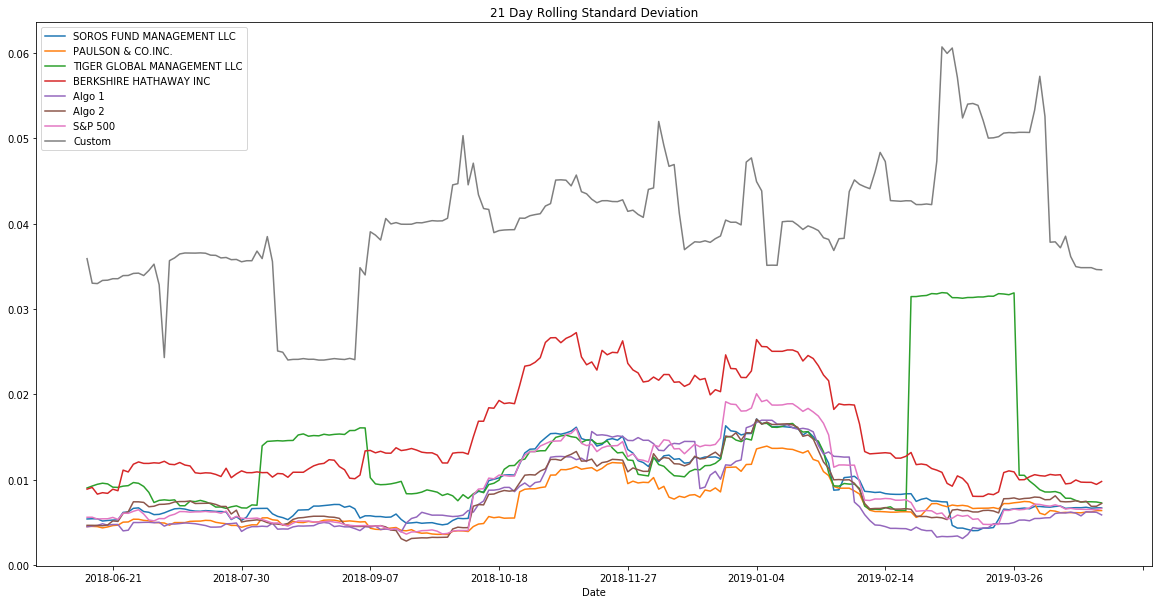

In [110]:
# Rolling
join_all_returns_df.rolling(window = 21).std().plot(figsize = (20,10), title = '21 Day Rolling Standard Deviation')

In [111]:
# Annualized Sharpe Ratios
join_sharpe_ratios = (join_all_returns_df.mean() * 252) / (join_all_returns_df.std() * np.sqrt(252))
join_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356148
PAULSON & CO.INC.              0.149759
TIGER GLOBAL MANAGEMENT LLC   -0.687898
BERKSHIRE HATHAWAY INC         0.135714
Algo 1                         1.935098
Algo 2                        -0.023980
S&P 500                        0.586578
Custom                         1.973827
dtype: float64

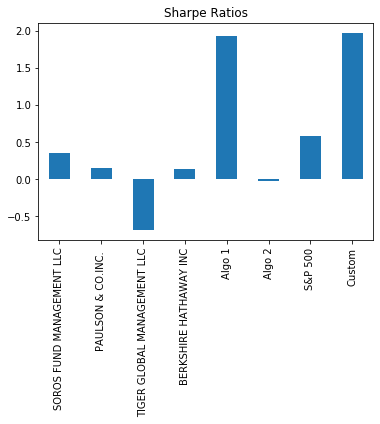

In [112]:
# Visualize the sharpe ratios as a bar plot
join_sharpe_ratios.plot(kind ='bar', title = 'Sharpe Ratios')

In [113]:
# Create a correlation analysis
join_correlation = join_all_returns_df.corr()
join_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.799174,0.491569,0.823018,0.351911,0.866104,0.879886,0.272090
PAULSON & CO.INC.,0.799174,1.000000,0.485279,0.662922,0.376096,0.794258,0.770127,0.310712
TIGER GLOBAL MANAGEMENT LLC,0.491569,0.485279,1.000000,0.327508,0.129695,0.420763,0.480628,0.136291
BERKSHIRE HATHAWAY INC,0.823018,0.662922,0.327508,1.000000,0.340137,0.792730,0.868426,0.243198
Algo 1,0.351911,0.376096,0.129695,0.340137,1.000000,0.386070,0.308003,0.140305
Algo 2,0.866104,0.794258,0.420763,0.792730,0.386070,1.000000,0.878890,0.288156
S&P 500,0.879886,0.770127,0.480628,0.868426,0.308003,0.878890,1.000000,0.273072
Custom,0.272090,0.310712,0.136291,0.243198,0.140305,0.288156,0.273072,1.000000


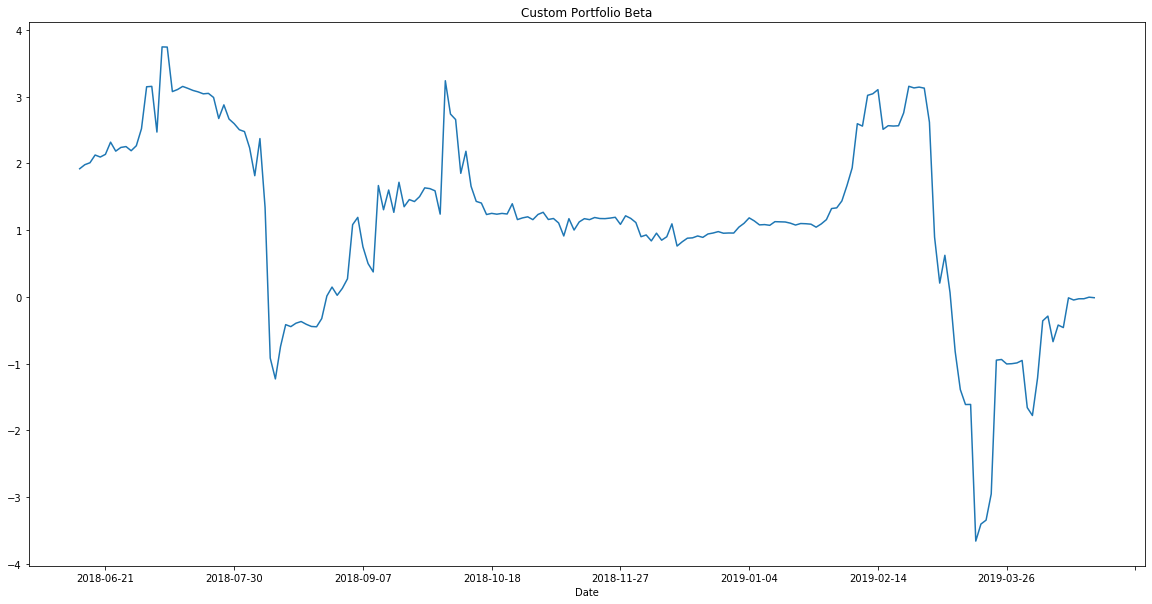

In [114]:
# Beta
rolling_covariance_custom = join_all_returns_df['Custom'].rolling(window =21).cov(join_all_returns_df['S&P 500'])
rolling_join_sp500_variance = join_all_returns_df['S&P 500'].rolling(window=21).var()

rolling_beta_custom = rolling_covariance_custom / rolling_join_sp500_variance
rolling_beta_custom.plot(figsize=(20, 10), title='Custom Portfolio Beta')